In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('madfhantr.csv')

In [70]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
pd.isnull(df).sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Imputing values

In [73]:
df["Credit_History"]= df.groupby('Property_Area')['Credit_History'].transform(lambda x: x.fillna(x.mode()[0]))

In [74]:
df["Credit_History"]= df.groupby('Property_Area')['Credit_History'].transform(lambda x: x.fillna(x.mode()[0]))
df['Gender']=df.groupby('Property_Area')['Gender'].transform(lambda x: x.fillna(x.mode()[0]))
df['Married']=df.groupby('Property_Area')['Married'].transform(lambda x: x.fillna(x.mode()[0]))
df['Dependents']=df.groupby('Property_Area')['Dependents'].transform(lambda x: x.fillna(x.mode()[0]))
df['Self_Employed']=df.groupby('Property_Area')['Self_Employed'].transform(lambda x: x.fillna(x.mode()[0]))

In [75]:
df['Loan_Amount_Term']=df.groupby('Property_Area')['Loan_Amount_Term'].transform(lambda x: x.fillna(x.median()))
df['LoanAmount']=df.groupby('Property_Area')['LoanAmount'].transform(lambda x: x.fillna(x.median()))

In [76]:
pd.isnull(df).sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [78]:
df.to_csv('Loans1.csv',index_label=False)

In [10]:
df.drop(['Loan_ID'],axis=1,inplace=True)

## Logistic Regression to identify significant variables

In [13]:
Xtrain = df.iloc[:,:-1]

In [14]:
ytrain = df.iloc[:,-1]

In [15]:
Xtrain = pd.get_dummies(Xtrain, columns=['Credit_History','Gender','Married','Dependents','Education','Self_Employed','Property_Area'],drop_first=True)

In [16]:
ytrain = pd.get_dummies(ytrain, columns=['Loan_Status'], drop_first=True)

In [17]:
ytrain.head()

,Y
0,1
1,0
2,1
3,1
4,1


In [18]:
Xtrain.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History_1.0,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,120.0,360.0,1,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1,1,0,0,0,0,0,0,0,1


In [19]:
import statsmodels.api as sm

In [21]:
mod = sm.Logit(ytrain, Xtrain)

In [22]:
res = mod.fit() 

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


C:\Users\richa\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\richa\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [23]:
print(res.summary()) 

                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  614
Model:                          Logit   Df Residuals:                      600
Method:                           MLE   Df Model:                           13
Date:                Mon, 07 Dec 2020   Pseudo R-squ.:                     inf
Time:                        12:41:49   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ApplicantIncome          2.522e-06   2.42e-05      0.104      0.917    -4.5e-05       5e-05
CoapplicantIncome       -6.479e-05   3.44e-05     -1.882      0.060      -0.000    2.69e-06


C:\Users\richa\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\richa\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [24]:
## New model

In [25]:
df2 = Xtrain[['Property_Area_Semiurban','Education_Not Graduate','Married_Yes','Credit_History_1.0', 'Loan_Amount_Term']]

In [26]:
df2.head()

,Property_Area_Semiurban,Education_Not Graduate,Married_Yes,Credit_History_1.0,Loan_Amount_Term
0,0,0,0,1,360.0
1,0,0,1,1,360.0
2,0,0,1,1,360.0
3,0,1,1,1,360.0
4,0,0,0,1,360.0


## Check both models using Classification Trees 

#### Model with all predictors

In [27]:
X1 = Xtrain.values

In [28]:
y = df['Loan_Status'].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25, random_state = 0)

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [31]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Y' 'Y']
 ['Y' 'N']
 ['Y' 'Y']
 ['N' 'N']
 ['Y' 'Y']
 ['N' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'N']
 ['Y' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'N']
 ['N' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'Y']
 ['N' 'Y']
 ['N' 'N']
 ['N' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'Y']
 ['N' 'Y']
 ['N' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'N']
 ['Y' 'Y']
 ['N' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'N']
 ['N' 'Y']
 ['Y' 'Y']
 ['N' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'Y']
 ['Y' 'Y']
 ['N' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'Y']
 ['Y' 'N']
 ['Y' 'Y']
 ['N' 'N']
 ['Y' 'Y']
 ['N' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'N']
 ['N' 'N']
 ['Y' 'Y']
 ['N' 'N']
 ['Y' 'Y']
 ['Y' 'N']
 ['Y' 'N']
 ['Y' 'Y']
 ['Y' 'N']
 ['N' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[27 16]
 [23 88]]


0.7467532467532467

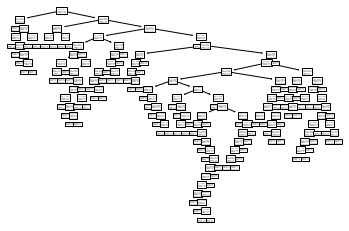

In [33]:
from sklearn import tree
tree.plot_tree(classifier);

#### Model with only significant predictors

In [34]:
X2 = df2.values

In [35]:
y = df['Loan_Status'].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.25, random_state = 0)

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [38]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Y' 'Y']
 ['Y' 'N']
 ['Y' 'Y']
 ['Y' 'N']
 ['Y' 'Y']
 ['N' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'N']
 ['Y' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'N']
 ['N' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'N']
 ['N' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'Y']
 ['Y' 'N']
 ['Y' 'Y']
 ['N' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'N']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'N']
 ['Y' 'N']
 ['Y' 'Y']
 ['N' 'N']
 ['N' 'Y']
 ['Y' 'N']
 ['Y' 'N']
 ['Y' 'Y']
 ['N' 'N']
 ['N' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']
 ['N' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 23  20]
 [  8 103]]


0.8181818181818182

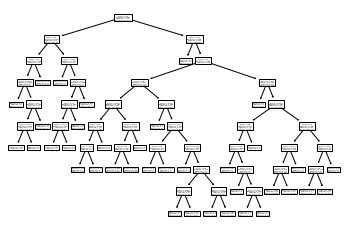

In [40]:
tree.plot_tree(classifier);

## Clustering to check models

#### Model 1 (all features)

In [41]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History_1.0       614 non-null    uint8  
 5   Gender_Male              614 non-null    uint8  
 6   Married_Yes              614 non-null    uint8  
 7   Dependents_1             614 non-null    uint8  
 8   Dependents_2             614 non-null    uint8  
 9   Dependents_3+            614 non-null    uint8  
 10  Education_Not Graduate   614 non-null    uint8  
 11  Self_Employed_Yes        614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(3), int64(1), u

In [ ]:
# feature scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain.iloc[:,0:4] = sc.fit_transform(Xtrain.iloc[:,0:4])

In [43]:
Xtrain.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History_1.0,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,-0.305158,0.273231,1,1,0,0,0,0,0,0,0,1
1,-0.134412,-0.038732,-0.209996,0.273231,1,1,1,1,0,0,0,0,0,0
2,-0.393747,-0.554487,-0.947497,0.273231,1,1,1,0,0,0,0,1,0,1
3,-0.462062,0.251980,-0.305158,0.273231,1,1,1,0,0,0,1,0,0,1
4,0.097728,-0.554487,-0.055359,0.273231,1,1,0,0,0,0,0,0,0,1


In [44]:
x = Xtrain.values

In [45]:
# builing PCA clustering model

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [47]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [48]:
principalDf.head(5)

,principal component 1,principal component 2
0,-0.262827,-0.637923
1,-0.201232,-0.109556
2,-0.945734,-0.521161
3,-0.553143,0.240753
4,-0.067757,-0.621599


In [49]:
finalDf = pd.concat([principalDf, df[['Loan_Status']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Loan_Status
0,-0.262827,-0.637923,Y
1,-0.201232,-0.109556,N
2,-0.945734,-0.521161,Y
3,-0.553143,0.240753,Y
4,-0.067757,-0.621599,Y


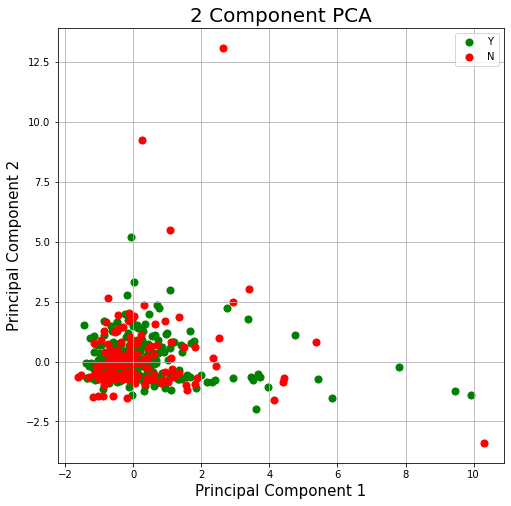

In [50]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Y', 'N']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Loan_Status'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Model 2 (Significant features  only)

In [51]:
 # feature scaling

In [52]:
df2.head()

,Property_Area_Semiurban,Education_Not Graduate,Married_Yes,Credit_History_1.0,Loan_Amount_Term
0,0,0,0,1,360.0
1,0,0,1,1,360.0
2,0,0,1,1,360.0
3,0,1,1,1,360.0
4,0,0,0,1,360.0


In [53]:
df2.drop(columns=['Loan_Amount_Term'],inplace=True)

C:\Users\richa\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
df2.head()

,Property_Area_Semiurban,Education_Not Graduate,Married_Yes,Credit_History_1.0
0,0,0,0,1
1,0,0,1,1
2,0,0,1,1
3,0,1,1,1
4,0,0,0,1


In [55]:
df2 = pd.concat([df2, Xtrain[['Loan_Amount_Term']]], axis = 1)

In [56]:
df2.head()

,Property_Area_Semiurban,Education_Not Graduate,Married_Yes,Credit_History_1.0,Loan_Amount_Term
0,0,0,0,1,0.273231
1,0,0,1,1,0.273231
2,0,0,1,1,0.273231
3,0,1,1,1,0.273231
4,0,0,0,1,0.273231


In [57]:
x1=df2.values

In [58]:
principalComponents = pca.fit_transform(x1)

In [59]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [60]:
finalDf = pd.concat([principalDf, df[['Loan_Status']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Loan_Status
0,-0.306208,-0.496822,Y
1,-0.244668,-0.255228,N
2,-0.244668,-0.255228,Y
3,-0.207683,-0.361182,Y
4,-0.306208,-0.496822,Y


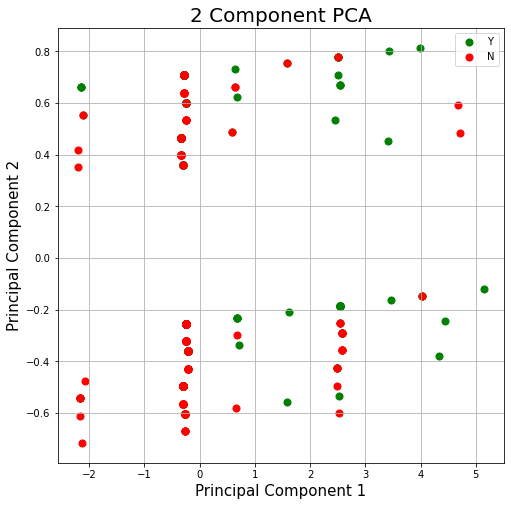

In [61]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Y', 'N']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Loan_Status'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [67]:
df[df['Loan_Amount_Term']==360].shape[0]

526